#  Task 2: Simple Sales Forecast with Moving Average

##  Description
In this task, we will implement a **basic sales forecasting method** using **moving averages**.  
The goal is to smooth sales data over time and generate simple predictions based on historical patterns.

---

##  Features to Implement
-  Compute **rolling averages** for **weekly** and **monthly** sales.
-  **Compare** predicted (forecasted) sales with **actual sales**.
-  **Visualize** sales trends and moving averages using plots.

---


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
train = pd.read_csv(r"C:\Users\Deepti\Downloads\train.csv",parse_dates=["date"])
print("Raw shape:", train.shape)
train.head()

Raw shape: (3000888, 6)


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [5]:
train['date'] = pd.to_datetime(train['date'])
print("Columns:", train.columns.tolist())
print("Missing values:\n", train.isnull().sum())
print("Sales stats:", train['sales'].min(), train['sales'].max(), train['sales'].mean())

Columns: ['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion']
Missing values:
 id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
Sales stats: 0.0 124717.0 357.77574911261877


In [6]:
daily_sales = train.groupby('date')['sales'].sum().reset_index().sort_values('date')
daily_sales.head()

,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229


In [9]:
daily_ts = daily_sales.set_index('date')['sales']
weekly_sales = daily_ts.resample('W').sum().reset_index()
monthly_sales = daily_ts.resample('ME').sum().reset_index()   # <-- Fixed here
print("Daily:", len(daily_sales), "Weekly:", len(weekly_sales), "Monthly:", len(monthly_sales))

Daily: 1684 Weekly: 242 Monthly: 56


In [13]:
# Moving averages
daily_sales['MA_7'] = daily_sales['sales'].rolling(7, min_periods=1).mean()
daily_sales['MA_14'] = daily_sales['sales'].rolling(14, min_periods=1).mean()
weekly_sales['MA_4w'] = weekly_sales['sales'].rolling(4, min_periods=1).mean()
monthly_sales['MA_3m'] = monthly_sales['sales'].rolling(3, min_periods=1).mean()
daily_sales.head(), weekly_sales.head(), monthly_sales.head()

(        date          sales           MA_7          MA_14
 0 2013-01-01    2511.618999    2511.618999    2511.618999
 1 2013-01-02  496092.417944  249302.018471  249302.018471
 2 2013-01-03  361461.231124  286688.422689  286688.422689
 3 2013-01-04  354459.677093  303631.236290  303631.236290
 4 2013-01-05  477350.121229  338375.013278  338375.013278,
         date         sales         MA_4w
 0 2013-01-06  2.211570e+06  2.211570e+06
 1 2013-01-13  2.373618e+06  2.292594e+06
 2 2013-01-20  2.368007e+06  2.317732e+06
 3 2013-01-27  2.272165e+06  2.306340e+06
 4 2013-02-03  2.476891e+06  2.372670e+06,
         date         sales         MA_3m
 0 2013-01-31  1.032762e+07  1.032762e+07
 1 2013-02-28  9.658960e+06  9.993292e+06
 2 2013-03-31  1.142850e+07  1.047169e+07
 3 2013-04-30  1.099346e+07  1.069364e+07
 4 2013-05-31  1.159770e+07  1.133989e+07)

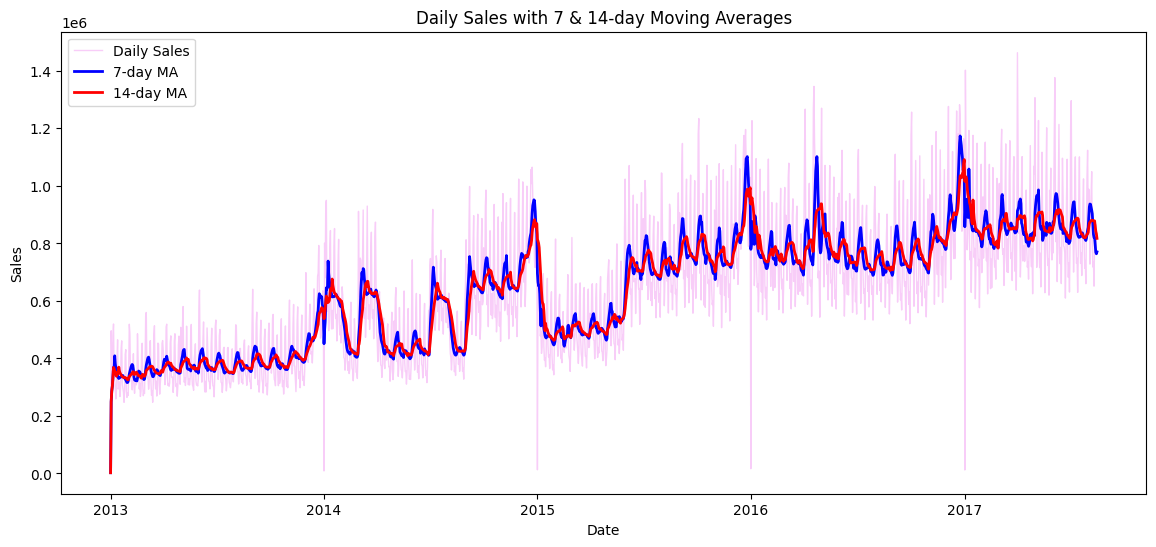

In [19]:
# Plot daily sales + moving averages
plt.figure(figsize=(14,6))
plt.plot(daily_sales['date'], daily_sales['sales'], color="violet", alpha=0.4, label="Daily Sales", linewidth=1)
plt.plot(daily_sales['date'], daily_sales['MA_7'], color="blue", label="7-day MA", linewidth=2)
plt.plot(daily_sales['date'], daily_sales['MA_14'], color="red", label="14-day MA", linewidth=2)
plt.title("Daily Sales with 7 & 14-day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


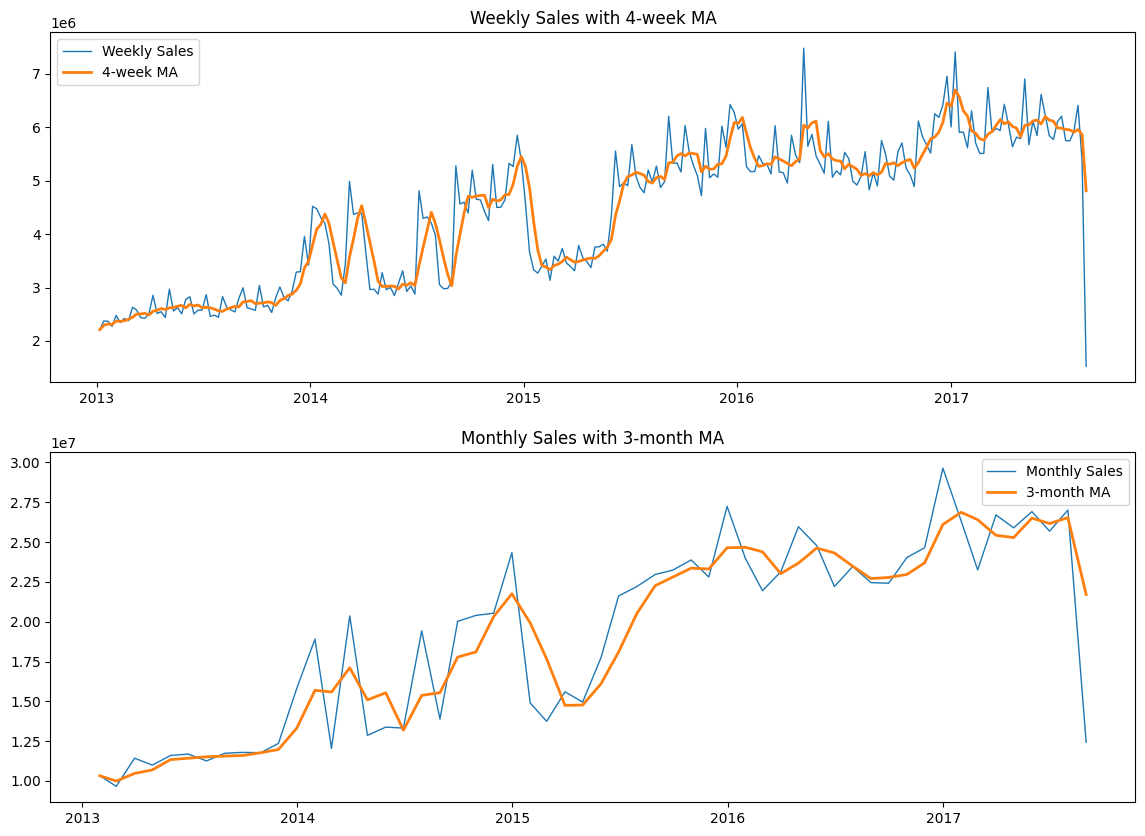

In [22]:
# Plot weekly & monthly sales with MAs
fig, ax = plt.subplots(2,1, figsize=(14,10))

ax[0].plot(weekly_sales['date'], weekly_sales['sales'], label="Weekly Sales", linewidth=1)
ax[0].plot(weekly_sales['date'], weekly_sales['MA_4w'], label="4-week MA", linewidth=2)
ax[0].set_title("Weekly Sales with 4-week MA")
ax[0].legend()

ax[1].plot(monthly_sales['date'], monthly_sales['sales'], label="Monthly Sales", linewidth=1)
ax[1].plot(monthly_sales['date'], monthly_sales['MA_3m'], label="3-month MA", linewidth=2)
ax[1].set_title("Monthly Sales with 3-month MA")
ax[1].legend()

plt.show()

In [26]:
daily_sales_7 = daily_sales['sales'].rolling(window=7).mean()
forecast_7 = daily_sales_7.shift(1)   

comparison = pd.DataFrame({
    "Date": daily_sales['date'].iloc[-30:].values,
    "Actual": daily_sales['sales'].iloc[-30:].values,
    "Forecast_7d": forecast_7.iloc[-30:].values
})

print("Actual vs Forecast (Last 30 Days):")
print(comparison.head(10))   


Actual vs Forecast (Last 30 Days):
        Date        Actual    Forecast_7d
0 2017-07-17  8.183255e+05  821216.489867
1 2017-07-18  7.301337e+05  823240.298597
2 2017-07-19  7.679788e+05  823183.004488
3 2017-07-20  6.882881e+05  825922.830513
4 2017-07-21  7.824183e+05  834299.502645
5 2017-07-22  9.329020e+05  836717.885763
6 2017-07-23  1.024289e+06  831550.017421
7 2017-07-24  8.165643e+05  820619.309167
8 2017-07-25  7.135816e+05  820367.709874
9 2017-07-26  7.406530e+05  818003.127541


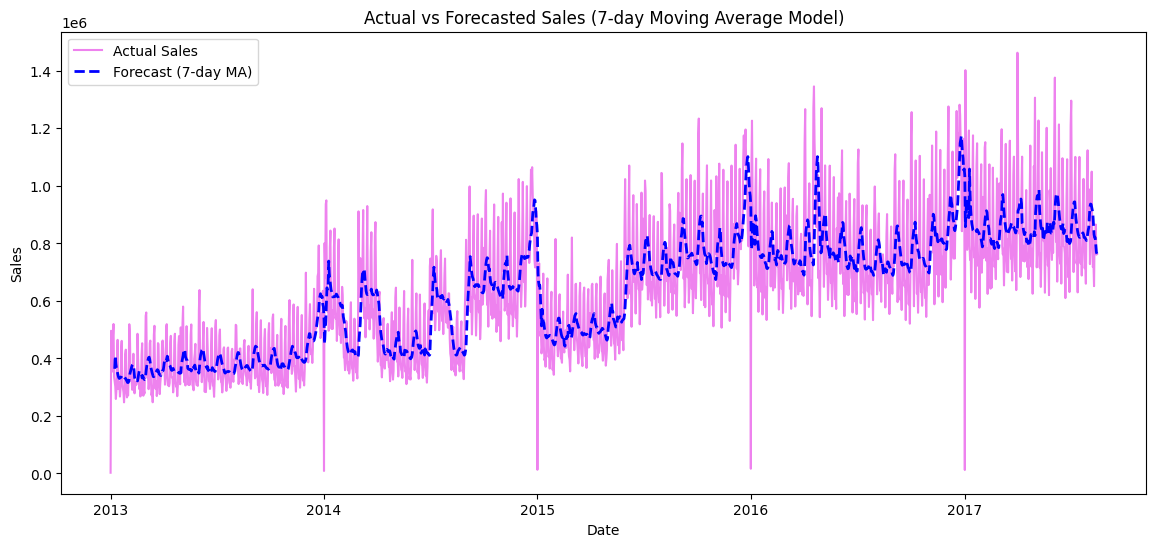

In [25]:
# Forecast vs Actual Sales Comparison
forecast_df = daily_sales.copy()
forecast_df['Forecast'] = forecast_df['sales'].shift(1).rolling(window=7).mean()

plt.figure(figsize=(14,6))
plt.plot(forecast_df['date'], forecast_df['sales'], label="Actual Sales", color="violet", linewidth=1.5)
plt.plot(forecast_df['date'], forecast_df['Forecast'], label="Forecast (7-day MA)", color="blue", linestyle="--", linewidth=2)
plt.title("Actual vs Forecasted Sales (7-day Moving Average Model)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()
